# This is to train the model

Our target from FreeCodeCamp is a Mean Absolute Error of less than $3500. Plus to use 80% of data for training and 20% for testing (I am ignoring the part which says to use TensorFlow). [My original answer](https://colab.research.google.com/drive/1lmV4xnToA9_rpmDHTrjD99WCdUqFrw11?usp=sharing) used TensorFlow.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from src.get_data import get_data, preprocess_data, split_train_test
from src.regression_stats import regression_stats

## Get the data

In [5]:
df = get_data()
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Sort out the data

In [7]:
df = preprocess_data(df)
df.head()

,age,bmi,children,smoker,expenses,female,northwest,southeast,southwest
0,19,27,0,1,16884,1,0,0,1
1,18,33,1,0,1725,0,0,1,0
2,28,33,3,0,4449,0,0,1,0
3,33,22,0,0,21984,0,1,0,0
4,32,28,0,0,3866,0,1,0,0


In [8]:
X_train, y_train, X_test, y_test = split_train_test(df)

In [10]:
X_train.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
578,52,30,1,0,0,0,0,1
610,47,29,1,0,1,0,1,0
569,48,40,2,1,0,1,0,0
1034,61,38,0,0,0,1,0,0
198,51,18,0,0,1,1,0,0


## Start modelling
### Linear Regression

RMSE: 6669.7450872207355
MAE: 4544.822632367126
R2: 0.7164174311153118


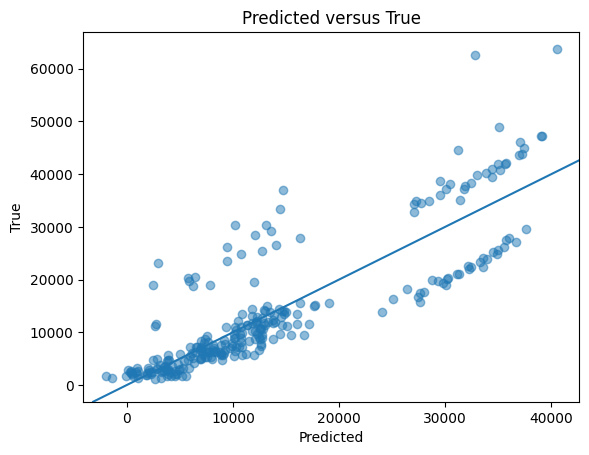

In [14]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mdl', LinearRegression())
])

lr_pipe = lr_pipe.fit(X_train, y_train)
regression_stats(y_test, lr_pipe.predict(X_test))

### Ridge

RMSE: 6669.237438863106
MAE: 4545.079251471081
R2: 0.7164605976066561


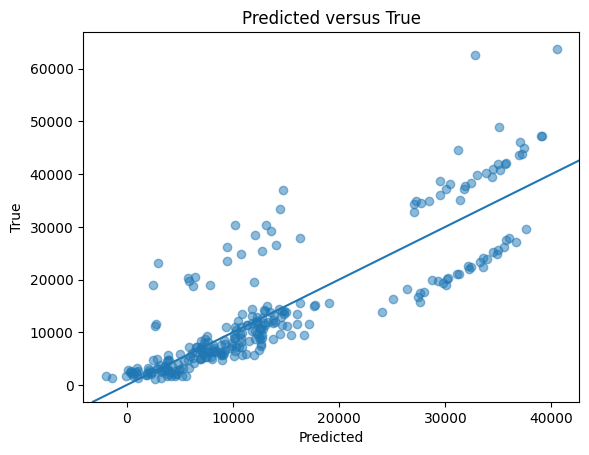

In [16]:
ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('mdl', Ridge())
])

ridge = ridge.fit(X_train, y_train)
regression_stats(y_test, ridge.predict(X_test))

### Lasso

RMSE: 6669.754616876435
MAE: 4544.814639974396
R2: 0.7164166207556536


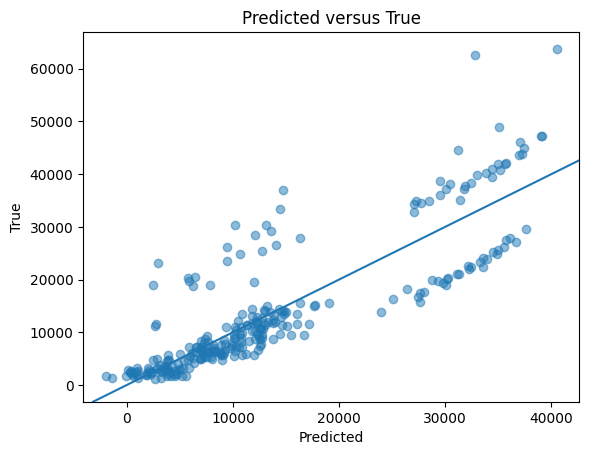

In [18]:
lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('mdl', Lasso())
])

params = {
    'mdl__fit_intercept': [True, False],
    'mdl__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
}
lasso = RandomizedSearchCV(lasso, params)
lasso.fit(X_train, y_train)
regression_stats(y_test, lasso.predict(X_test))

### ElasticNet

c:\Users\link4\.virtualenvs\fccPredictHealthCostsWithRegression-KK2LLGO0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+11, tolerance: 2.575e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\link4\.virtualenvs\fccPredictHealthCostsWithRegression-KK2LLGO0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+11, tolerance: 2.703e+07 Linear regression models with null weight for the l1 regul

RMSE: 6662.484590126651
MAE: 4553.738200325298
R2: 0.7170344951058013


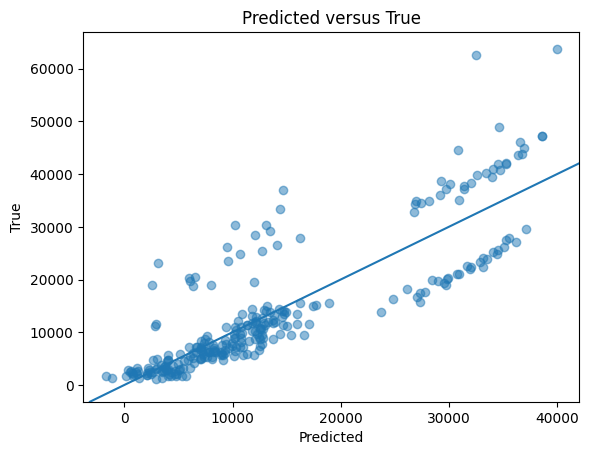

In [20]:
elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('mdl', ElasticNet())
])

params = {
    'mdl__fit_intercept': [True, False],
    'mdl__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2],
    'mdl__l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
elastic = RandomizedSearchCV(elastic, params)
elastic.fit(X_train, y_train)
regression_stats(y_test, elastic.predict(X_test))

### Decision Tree

c:\Users\link4\.virtualenvs\fccPredictHealthCostsWithRegression-KK2LLGO0\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE: 7071.872727969376
MAE: 3362.402985074627
R2: 0.6811914699249288


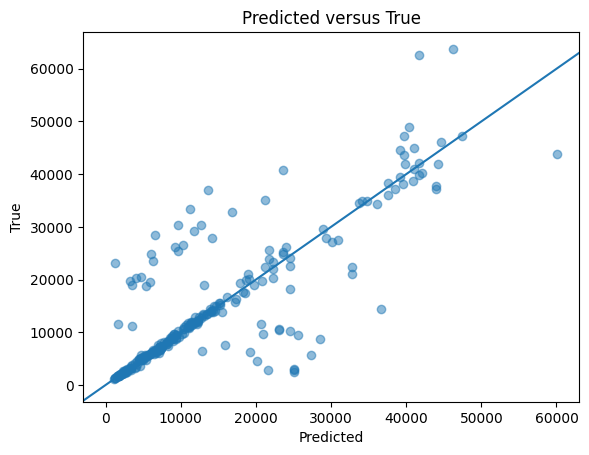

In [22]:
dt = DecisionTreeRegressor()

params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
}
dt = RandomizedSearchCV(dt, params)
dt.fit(X_train, y_train)
regression_stats(y_test, dt.predict(X_test))

### Random Forest Regressor

c:\Users\link4\.virtualenvs\fccPredictHealthCostsWithRegression-KK2LLGO0\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE: 5735.794389746836
MAE: 2893.068376066098
R2: 0.790275962285204


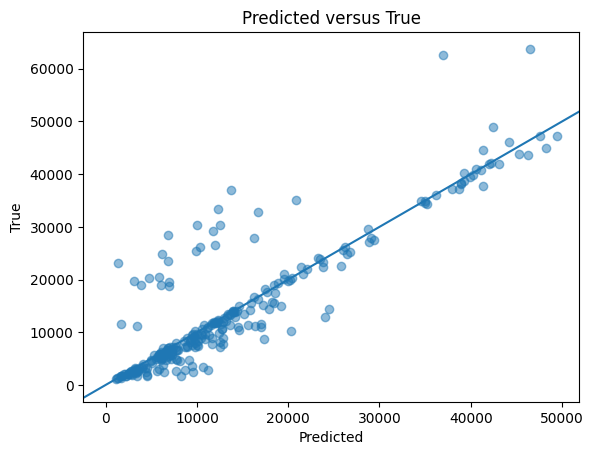

In [24]:
rf = RandomForestRegressor()

params = {
    'criterion': ['squared_error', 'absolute_error'],
    'bootstrap': [True, False],
}
rf = RandomizedSearchCV(rf, params)
rf.fit(X_train, y_train)
regression_stats(y_test, rf.predict(X_test))

In [30]:
joblib.dump(rf.best_estimator_, 'rf.joblib')

['rf.joblib']